In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv
/kaggle/input/heart-attack-engineered-dataset-1/heart_attack_engineered_dataset_1.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Linear Models

## Prepare Data

In [3]:
heart_data = pd.read_csv("../input/heart-attack-engineered-dataset-1/heart_attack_engineered_dataset_1.csv")

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(heart_data.drop(columns=['output']),
                                                    heart_data['output'], 
                                                    test_size=0.5, 
                                                    random_state=125)

In [5]:
# correlation_matrix = X_train.corr()

# correlation_matrix.head()

In [6]:
# corr_columns = correlation_matrix.columns.tolist()

In [7]:
# plt.figure(figsize=(25,25))
# # sns.heatmap(correlation_matrix[(correlation_matrix[corr_columns] < 0.6)  | (correlation_matrix[corr_columns] > -0.6)])

# sns.heatmap(correlation_matrix[:25], vmin=-1.0, vmax=1.0, cmap="Blues",annot=True)

## Logistic Regression

#### Hyperparameter Optimization

In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [9]:
# model = LogisticRegression(max_iter=200)

# param_grid = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               "penalty" : ['l1','l2','elasticnet', 'none'], 
#               "C" : [100, 10, 1.0, 0.1, 0.01] }

In [10]:
# grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_log_error', cv=10)
# grid = GridSearchCV(model, param_grid, scoring='roc_auc', cv=10)

# # random_search = RandomizedSearchCV(model, param_grid, scoring='neg_mean_squared_log_error', cv=10)

In [11]:
# %%time
# # random_search.fit(X_train, y_train)
# grid.fit(X_train, y_train)

In [12]:
# random_search.best_params_
# grid.best_params_

**End of hyperparameter optimization**

grid search took 67s to run

Best Parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

Now build model with best parameters.

In [13]:
# found with scoring='neg_mean_squared_log_error' in grid_search
model = LogisticRegression(max_iter=200, C=1.0, penalty='l2' ,solver='liblinear')

# found with scoring='roc_auc' in grid_search (worse than above model)
# model = LogisticRegression(max_iter=200, C=10, penalty='l2' ,solver='liblinear')

In [14]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [15]:
predictions = model.predict(X_test)

### Analysis of Performance

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        72
           1       0.76      0.84      0.80        80

    accuracy                           0.78       152
   macro avg       0.78      0.77      0.77       152
weighted avg       0.78      0.78      0.78       152



In [18]:
conf_matrix = confusion_matrix(y_test, predictions)

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Prediction')

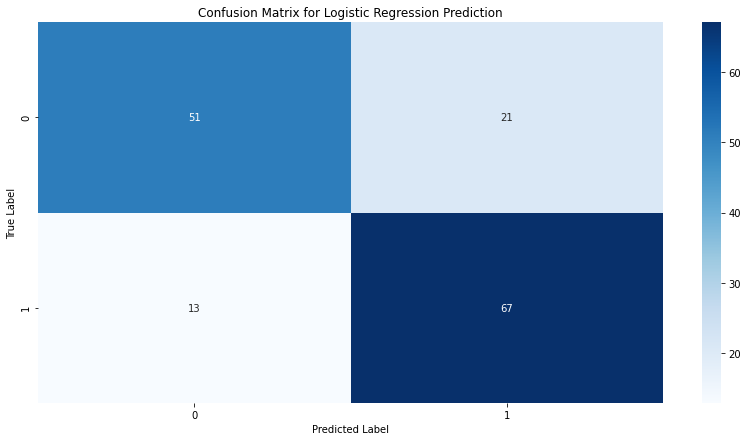

In [19]:
plt.figure(figsize=(14,7))
sns.heatmap(conf_matrix, annot=True, cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Prediction")